<a href="https://colab.research.google.com/github/DarcyZeng1/AirlinePassengerReviewsData/blob/main/CSI4106_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSI4106 Assignment 2

Group:#49\
Student Name: Darcy Zeng\
Student ID: 300238100



**Import neccesary tools**

In [ ]:
import pandas as pd
import itertools
import numpy as np
#!pip install pandas scikit-learn

**Read Dataset**




In [ ]:
url = "https://raw.githubusercontent.com/DarcyZeng1/WineDataSet/master/WineQT.csv"
dataset = pd.read_csv(url)

Check the colums of the dataset

In [ ]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Check Check the first 10 entries:

In [ ]:
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Descriptive statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000

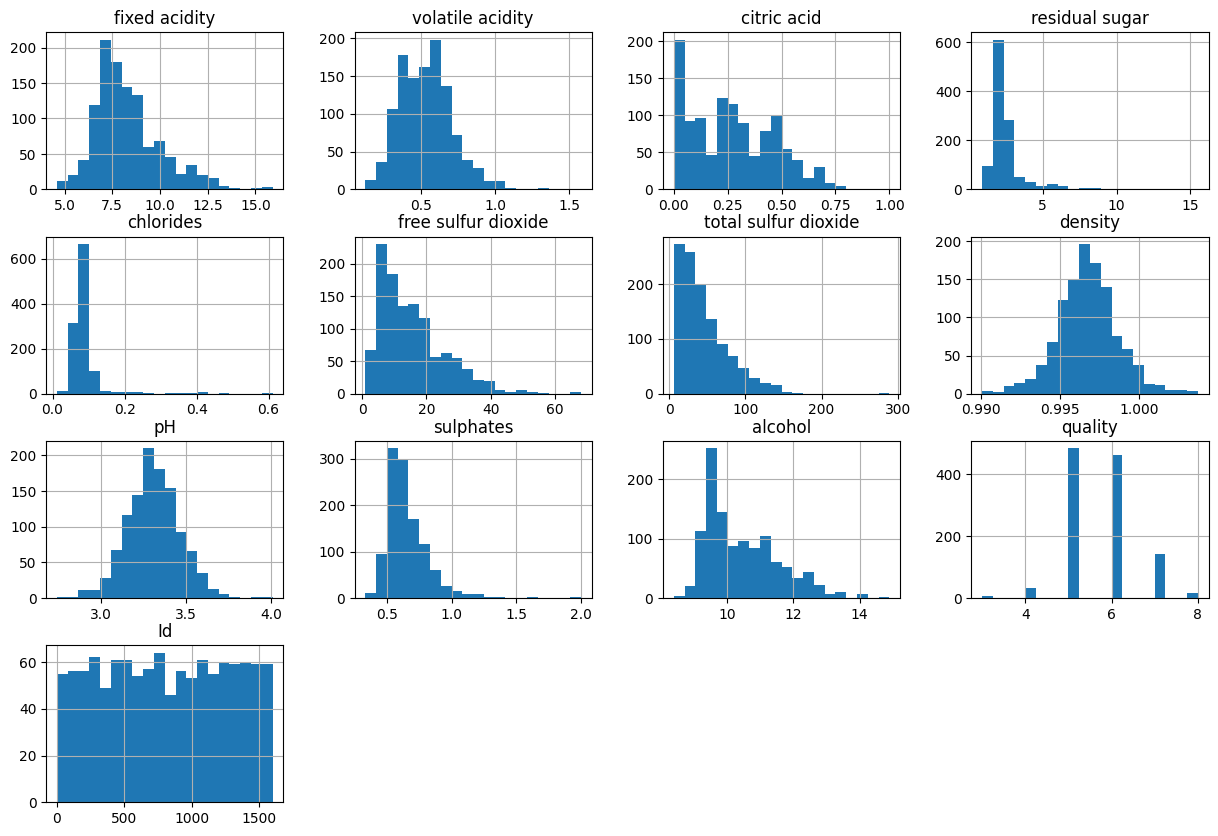

In [ ]:
# 1. Check for missing values
missing_values = dataset.isnull().sum()

print("Missing values:\n", missing_values)
print()

# 2. Basic Descriptive Statistics
descriptive_stats = dataset.describe()
print("Descriptive statistics:\n", descriptive_stats)
print()

# 3. Feature Ranges
feature_ranges = dataset.max() - dataset.min()
print("Feature ranges:\n", feature_ranges)
print()

# 4. Visualization
dataset.hist(bins=20, figsize=(15, 10))
plt.show()


**1: Familiarize yourself with the classification task and the dataset**

**a. What is the goal of the task? Is this for a particular application?**

The goal of the task for this particular application is to predict the quality of wine using the features.

**b. Characterize the dataset in terms of number of training examples, number of
features, missing data, etc,**

Number of Training Examples:
The dataset contains 1143 examples (rows).

Missing Values:
There are no missing values in the dataset, which is excellent. It simplifies the data preprocessing step, and you can be confident that all entries are complete.

Number of Features:
There are 12 features in the dataset: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.

General Observations:
The dataset seems to have a reasonable spread of values for each feature, and there are no extreme outliers based on the provided statistics.

Target Variable (quality):
The quality feature, being the target variable, has a range from 3 to 8,  a multi-class classification problem.

**2. Brainstorm about the attributes**

Remove empty values if exist:

In [ ]:
#Ignore the warning messages.

dataset = dataset.dropna()

I tried to visualize how relevent the data is to the target (quality) using graphs.

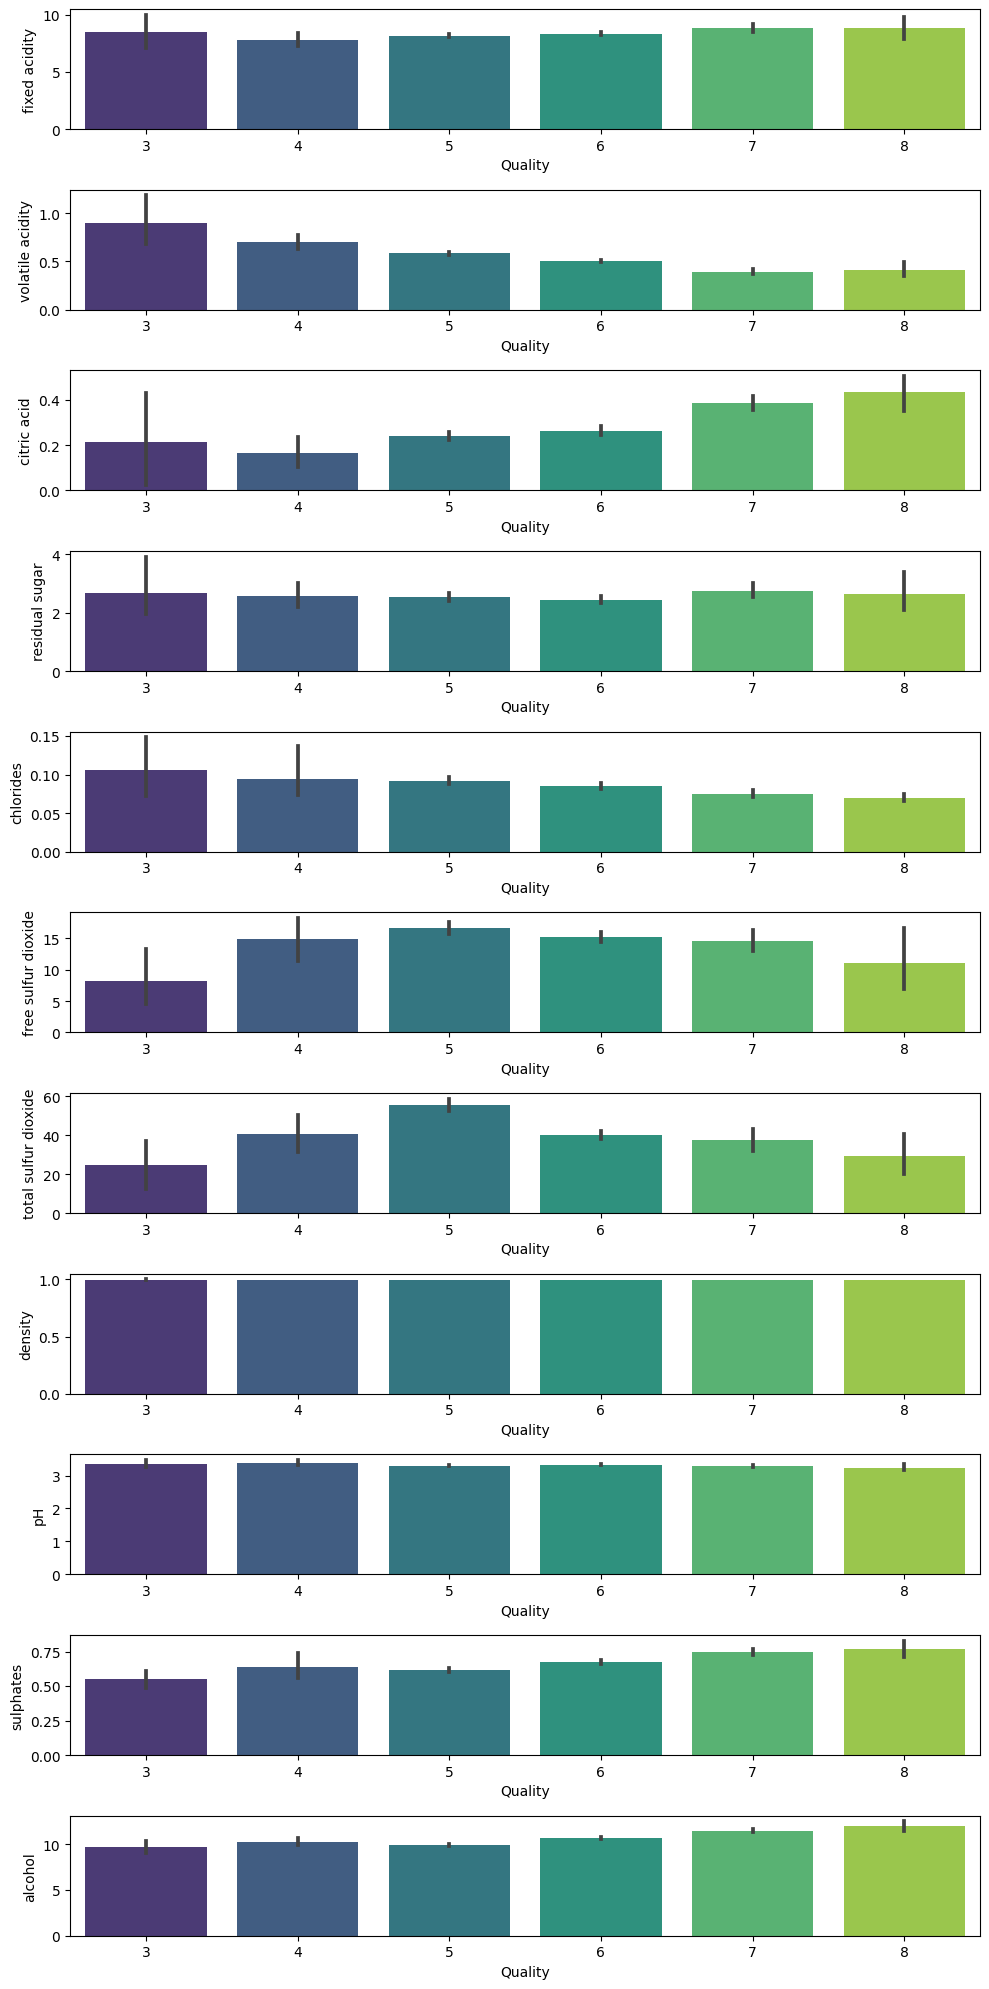

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'quality' and other features
temp = dataset
# List of features to compare
features_to_compare = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_compare), ncols=1, figsize=(10, 20))

# Loop through each feature and create a bar plot
for i, feature in enumerate(features_to_compare):
    sns.barplot(x='quality', y=feature, data=temp, ax=axes[i], palette='viridis')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Quality')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


**Justification of dataset choice to drop**\
Above you can see that density feature is not usuful to the determine the target. Similar with the pH level. Other features such as total sulfier dioxide smeems scattered and not much related to the quality of the wine. I also tried randomly dropping one of the features to see if the accuracy would imprpve.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score

# The 'Quality' is the target variable
# Split data into features and target
X = dataset.drop(['quality', 'Id'], axis=1)  # Exclude 'ID' as it's not needed for modeling
y = dataset['quality'] #set y as target

**3. Encode features and 4. Define 2 models**

**Logistic Regression Model**

In [ ]:
#One-hot encoding is not needed since the attributes are already continuous.

# drop the features that seems not releveant to the target
log_data = X.drop(['pH','density','total sulfur dioxide'], axis = 1)

# Standardize continuous features for both datasets
scaler = StandardScaler()
log_scaled = scaler.fit_transform(log_data)

# Split the data into training and testing sets for both datasets
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(log_scaled, y, test_size=0.2, random_state=42)


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_log, y_train_log)
#test the accuracy of the model
logreg_preds = logreg_model.predict(X_test_log)
logreg_accuracy = accuracy_score(y_test_log, logreg_preds)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')


Logistic Regression Accuracy: 0.66


Analysis: with all features:
Logistic Regression Accuracy: 0.63

after removing pH and density:
Logistic Regression Accuracy: 0.66


**Naive Bayes Model**

In [ ]:
# drop the features that seems not releveant to the target
nb_data = X.drop(['density', 'pH','total sulfur dioxide','citric acid','residual sugar', 'sulphates'], axis=1)

# Standardize continuous features for both datasets
nb_scaled = scaler.fit_transform(nb_data)

# Split the data into training and testing sets for both datasets
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(nb_scaled, y, test_size=0.2, random_state=42)

# Naive Bayes (GaussianNB)
nb_model_gauss = GaussianNB()
nb_model_gauss.fit(X_train_nb, y_train_nb)
#test the accuracy of the model
nb_preds_gauss = nb_model_gauss.predict(X_test_nb)
nb_accuracy_gauss = accuracy_score(y_test_nb, nb_preds_gauss)
print(f'Naive Bayes (GaussianNB) Accuracy: {nb_accuracy_gauss:.2f}')

Naive Bayes (GaussianNB) Accuracy: 0.61


Naive Bayes Accuracy without dropping any features: 59%

Naive Bayes Accuracy dropping ['density', 'pH','total sulfur dioxide','citric acid']: 60%

Naive Bayes Accuracy dropping ['density', 'pH','total sulfur dioxide','citric acid','residual sugar', 'sulphates']: 61%

**5. Train the model**

**Logistic Regression cross-validaiton**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results = cross_val_score(logreg_model, log_scaled, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy: {cross_val_results.mean():.2f}')

# Precision and Recall Score
logreg_preds = cross_val_predict(logreg_model, log_scaled, y, cv=cv)
precision_micro = precision_score(y, logreg_preds, average='micro', zero_division=1)
recall_micro = recall_score(y, logreg_preds, average='micro')

precision_macro = precision_score(y, logreg_preds, average='macro', zero_division=1)
recall_macro = recall_score(y, logreg_preds, average='macro')

print(f'Micro-average Precision: {precision_micro:.2f}')
print(f'Micro-average Recall: {recall_micro:.2f}')
print()
print(f'Macro-average Precision: {precision_macro:.2f}')
print(f'Macro-average Recall: {recall_macro:.2f}')




Cross-Validation Accuracy: 0.59
Micro-average Precision: 0.59
Micro-average Recall: 0.59

Macro-average Precision: 0.45
Macro-average Recall: 0.27


**Analysis of Logistic Regression Cross-validation**

a. 4 fold cross-validation is used.

b. By looking at the result, the Macro average result is much lower than the Micro average results. This could be an indication of class imbalance.

**Naive Bayes cross-validation**

In [ ]:
# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results_gauss = cross_val_score(nb_model_gauss, nb_scaled, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Accuracy (GaussianNB): {cross_val_results_gauss.mean():.2f}')

# Precision and Recall score
nb_preds_cv_gauss = cross_val_predict(nb_model_gauss, nb_scaled, y, cv=cv)
precision_micro_gauss = precision_score(y, nb_preds_cv_gauss, average='micro', zero_division=1)
recall_micro_gauss = recall_score(y, nb_preds_cv_gauss, average='micro')

precision_macro_gauss = precision_score(y, nb_preds_cv_gauss, average='macro', zero_division=1)
recall_macro_gauss = recall_score(y, nb_preds_cv_gauss, average='macro')

print(f'Micro-average Precision (GaussianNB): {precision_micro_gauss:.2f}')
print(f'Micro-average Recall (GaussianNB): {recall_micro_gauss:.2f}')
print()
print(f'Macro-average Precision (GaussianNB): {precision_macro_gauss:.2f}')
print(f'Macro-average Recall (GaussianNB): {recall_macro_gauss:.2f}')


Cross-Validation Accuracy (GaussianNB): 0.56
Micro-average Precision (GaussianNB): 0.56
Micro-average Recall (GaussianNB): 0.56

Macro-average Precision (GaussianNB): 0.32
Macro-average Recall (GaussianNB): 0.29


**Analysis of Naive Bayes Cross-validation**

a. 4-fold cross-validation is used.

b. Similar to the logistic regression cross-validationr result, the Macro average result is much lower than the Micro average results. This could be an indication of class imbalance.

**6. Modify some parameters**

**Logistic Regression Experiment 1:**

In [ ]:

# Experiment 1: Change Solver
logreg_model_exp1 = LogisticRegression(solver='liblinear')  # Change solver to 'liblinear'
logreg_model_exp1.fit(X_train_log, y_train_log)

# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results_exp1 = cross_val_score(logreg_model_exp1, log_scaled, y, cv=cv, scoring='accuracy')
print(f'Experiment 1: Cross-Validation Accuracy (Changed Solver): {cross_val_results_exp1.mean():.2f}')

# Precision, Recall, and F1 Score
logreg_preds_exp1 = cross_val_predict(logreg_model_exp1, log_scaled, y, cv=cv)
precision_micro_exp1 = precision_score(y, logreg_preds_exp1, average='micro', zero_division=1)
recall_micro_exp1 = recall_score(y, logreg_preds_exp1, average='micro')

precision_macro_exp1 = precision_score(y, logreg_preds_exp1, average='macro', zero_division=1)
recall_macro_exp1 = recall_score(y, logreg_preds_exp1, average='macro')

print(f'Micro-average Precision (Changed Solver): {precision_micro_exp1:.2f}')
print(f'Micro-average Recall (Changed Solver): {recall_micro_exp1:.2f}')
print()
print(f'Macro-average Precision (Changed Solver): {precision_macro_exp1:.2f}')
print(f'Macro-average Recall (Changed Solver): {recall_macro_exp1:.2f}')


Experiment 1: Cross-Validation Accuracy (Changed Solver): 0.59
Micro-average Precision (Changed Solver): 0.59
Micro-average Recall (Changed Solver): 0.59

Macro-average Precision (Changed Solver): 0.78
Macro-average Recall (Changed Solver): 0.25


**Logistic Regression Experiment 2:**

In [ ]:
# Logistic Regression with changed tolerance
logreg_model_tuned = LogisticRegression(tol=5)  # Change tolerance to 1e-4
logreg_model_tuned.fit(X_train_log, y_train_log)

# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results_tuned = cross_val_score(logreg_model_tuned, log_scaled, y, cv=cv, scoring='accuracy')
print(f'Tuned Logistic Regression - Cross-Validation Accuracy: {cross_val_results_tuned.mean():.2f}')

# Precision, Recall, and F1 Score
logreg_preds_tuned = cross_val_predict(logreg_model_tuned, log_scaled, y, cv=cv)
precision_micro_tuned = precision_score(y, logreg_preds_tuned, average='micro', zero_division=1)
recall_micro_tuned = recall_score(y, logreg_preds_tuned, average='micro')

precision_macro_tuned = precision_score(y, logreg_preds_tuned, average='macro', zero_division=1)
recall_macro_tuned = recall_score(y, logreg_preds_tuned, average='macro')

print(f'Tuned Logistic Regression - Micro-average Precision: {precision_micro_tuned:.2f}')
print(f'Tuned Logistic Regression - Micro-average Recall: {recall_micro_tuned:.2f}')
print()
print(f'Tuned Logistic Regression - Macro-average Precision: {precision_macro_tuned:.2f}')
print(f'Tuned Logistic Regression - Macro-average Recall: {recall_macro_tuned:.2f}')

Tuned Logistic Regression - Cross-Validation Accuracy: 0.60
Tuned Logistic Regression - Micro-average Precision: 0.60
Tuned Logistic Regression - Micro-average Recall: 0.60

Tuned Logistic Regression - Macro-average Precision: 0.61
Tuned Logistic Regression - Macro-average Recall: 0.28


**Naive Bayes Experiment 1:**

In [ ]:
# Experiment 2: Change Smoothing Parameter (Alpha)
nb_model_exp2 = GaussianNB(var_smoothing=1e-9)  # Change smoothing parameter to 1e-9
nb_model_exp2.fit(X_train_nb, y_train_nb)

# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results_exp2 = cross_val_score(nb_model_exp2, nb_scaled, y, cv=cv, scoring='accuracy')
print(f'Experiment 2: Cross-Validation Accuracy (Changed Alpha): {cross_val_results_exp2.mean():.2f}')

# Precision, Recall, and F1 Score
nb_preds_exp2 = cross_val_predict(nb_model_exp2, nb_scaled, y, cv=cv)
precision_micro_exp2 = precision_score(y, nb_preds_exp2, average='micro', zero_division=1)
recall_micro_exp2 = recall_score(y, nb_preds_exp2, average='micro')

precision_macro_exp2 = precision_score(y, nb_preds_exp2, average='macro', zero_division=1)
recall_macro_exp2 = recall_score(y, nb_preds_exp2, average='macro')

print(f'Micro-average Precision (Changed Alpha): {precision_micro_exp2:.2f}')
print(f'Micro-average Recall (Changed Alpha): {recall_micro_exp2:.2f}')
print()
print(f'Macro-average Precision (Changed Alpha): {precision_macro_exp2:.2f}')
print(f'Macro-average Recall (Changed Alpha): {recall_macro_exp2:.2f}')


Experiment 2: Cross-Validation Accuracy (Changed Alpha): 0.56
Micro-average Precision (Changed Alpha): 0.56
Micro-average Recall (Changed Alpha): 0.56

Macro-average Precision (Changed Alpha): 0.32
Macro-average Recall (Changed Alpha): 0.29


**Naive Bayes Experiment 2:**

In [ ]:
# Experiment 2: Change Smoothing Parameter (Alpha)
nb_model_exp2 = GaussianNB(var_smoothing=10)  # Change smoothing parameter to 1e-9
nb_model_exp2.fit(X_train_nb, y_train_nb)

# Cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
cross_val_results_exp2 = cross_val_score(nb_model_exp2, nb_scaled, y, cv=cv, scoring='accuracy')
print(f'Experiment 2: Cross-Validation Accuracy (Changed Alpha): {cross_val_results_exp2.mean():.2f}')

# Precision, Recall, and F1 Score
nb_preds_exp2 = cross_val_predict(nb_model_exp2, nb_scaled, y, cv=cv)
precision_micro_exp2 = precision_score(y, nb_preds_exp2, average='micro', zero_division=1)
recall_micro_exp2 = recall_score(y, nb_preds_exp2, average='micro')

precision_macro_exp2 = precision_score(y, nb_preds_exp2, average='macro', zero_division=1)
recall_macro_exp2 = recall_score(y, nb_preds_exp2, average='macro')

print(f'Micro-average Precision (Changed Alpha): {precision_micro_exp2:.2f}')
print(f'Micro-average Recall (Changed Alpha): {recall_micro_exp2:.2f}')
print()
print(f'Macro-average Precision (Changed Alpha): {precision_macro_exp2:.2f}')
print(f'Macro-average Recall (Changed Alpha): {recall_macro_exp2:.2f}')

Experiment 2: Cross-Validation Accuracy (Changed Alpha): 0.54
Micro-average Precision (Changed Alpha): 0.54
Micro-average Recall (Changed Alpha): 0.54

Macro-average Precision (Changed Alpha): 0.84
Macro-average Recall (Changed Alpha): 0.21


**7. Analyze the obtained results**

**Output comparison for Logistic Regression**

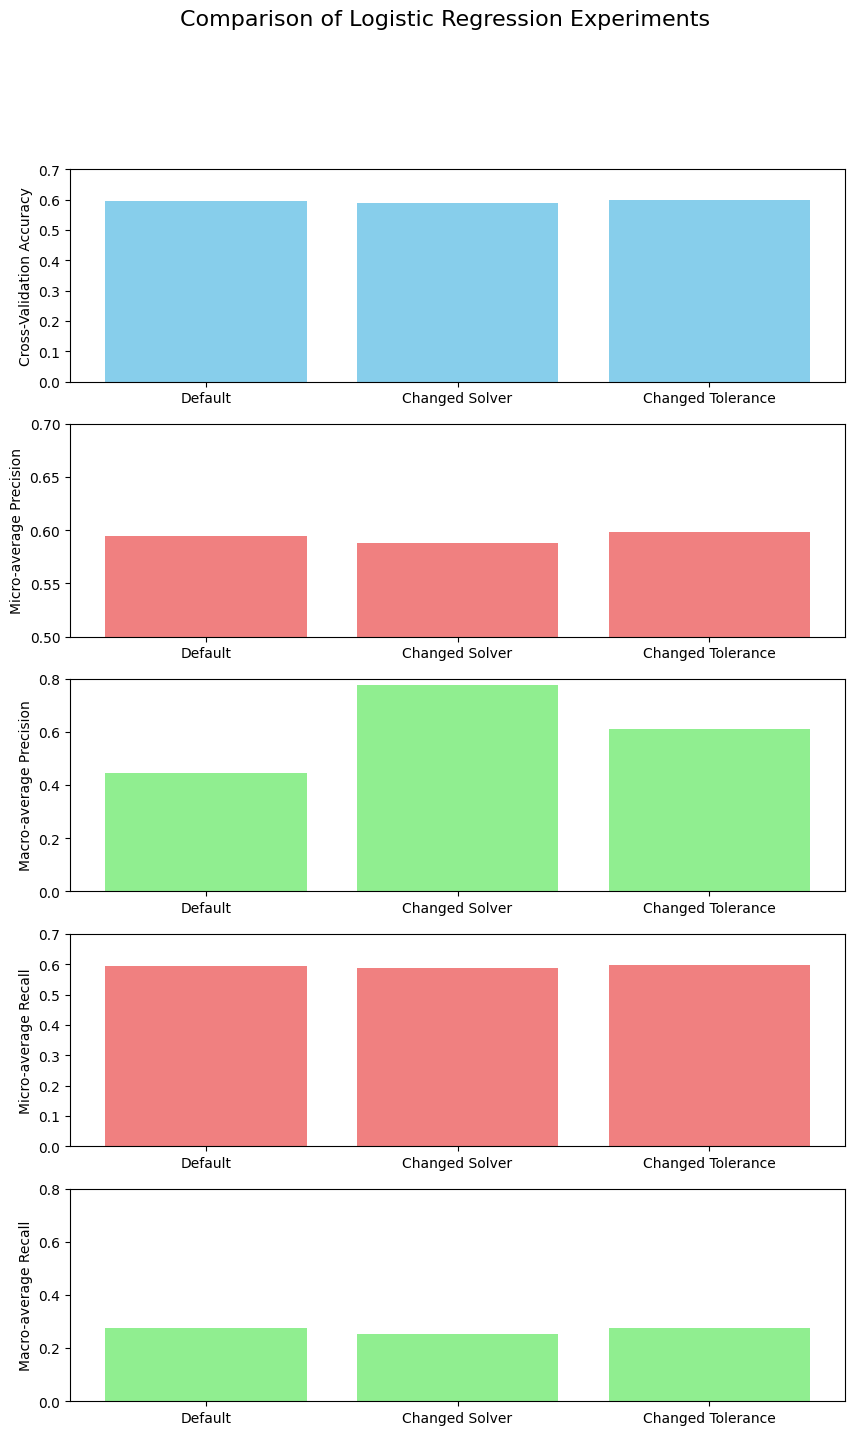

In [ ]:
# Results
accuracy_values = [cross_val_results.mean(), cross_val_results_exp1.mean(), cross_val_results_tuned.mean()]
micro_precision_values = [precision_micro, precision_micro_exp1, precision_micro_tuned]
macro_precision_values = [precision_macro, precision_macro_exp1, precision_macro_tuned]
micro_recall_values = [recall_micro, recall_micro_exp1, recall_micro_tuned]
macro_recall_values = [recall_macro, recall_macro_exp1, recall_macro_tuned]

# Experiment labels
experiments = ['Default', 'Changed Solver', 'Changed Tolerance']

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(10, 16))

# Cross-Validation Accuracy
axes[0].bar(experiments, accuracy_values, color='skyblue')
axes[0].set_ylabel('Cross-Validation Accuracy')
axes[0].set_ylim([0.0, 0.7])

# Micro-average Precision
axes[1].bar(experiments, micro_precision_values, color='lightcoral')
axes[1].set_ylabel('Micro-average Precision')
axes[1].set_ylim([0.5, 0.7])

# Macro-average Precision
axes[2].bar(experiments, macro_precision_values, color='lightgreen')
axes[2].set_ylabel('Macro-average Precision')
axes[2].set_ylim([0.0, 0.8])

# Micro-average Recall
axes[3].bar(experiments, micro_recall_values, color='lightcoral')
axes[3].set_ylabel('Micro-average Recall')
axes[3].set_ylim([0.0, 0.7])

# Macro-average Recall
axes[4].bar(experiments, macro_recall_values, color='lightgreen')
axes[4].set_ylabel('Macro-average Recall')
axes[4].set_ylim([0.0, 0.8])

# Title
fig.suptitle('Comparison of Logistic Regression Experiments', fontsize=16)
plt.show()


**For Logistic Regression:**\
Cross-Validation Accuracy:

Experiment 2 with changed tolerance shows a slightly higher accuracy (0.60) compared to the default (0.59) and Experiment 1 (0.59).

Micro-average Precision and Recall:
All experiments, including the default, have consistent micro-average precision and recall of 0.59. No significant improvement in micro-average metrics is observed.

Macro-average Precision and Recall:
Experiment 1 (Changed Solver) shows a substantial increase in macro-average precision (0.78) compared to the default (0.45), indicating better performance in capturing class-specific patterns. However, this improvement comes at the cost of a decreased macro-average recall (0.25). Experiment 2 (Changed Tolerance) shows a modest improvement in both precision (0.61) and recall (0.28).

In the default model, the micro-average recall is much twice the macro-average recall. This could mean that the model is performing exceptionally well on some specific classes (possibly the larger ones) and poorly on others. The dominant classes disproportionately influence the Micro Recall, making it higher than the Macro Recall.

Discussion:
The choice of solver and tolerance in logistic regression can influence the model's behavior. Experiment 1, while improving precision, sacrifices recall, suggesting a trade-off between precision and recall. Experiment 2, with changed tolerance, shows a more balanced improvement in both macro-average precision and recall.


Further Exploration:
Fine-tuning hyperparameters, exploring other solver options, and testing on a larger set of variations could provide a more comprehensive understanding of the logistic regression model's performance.


**Output Comparison for Naive Bayes**

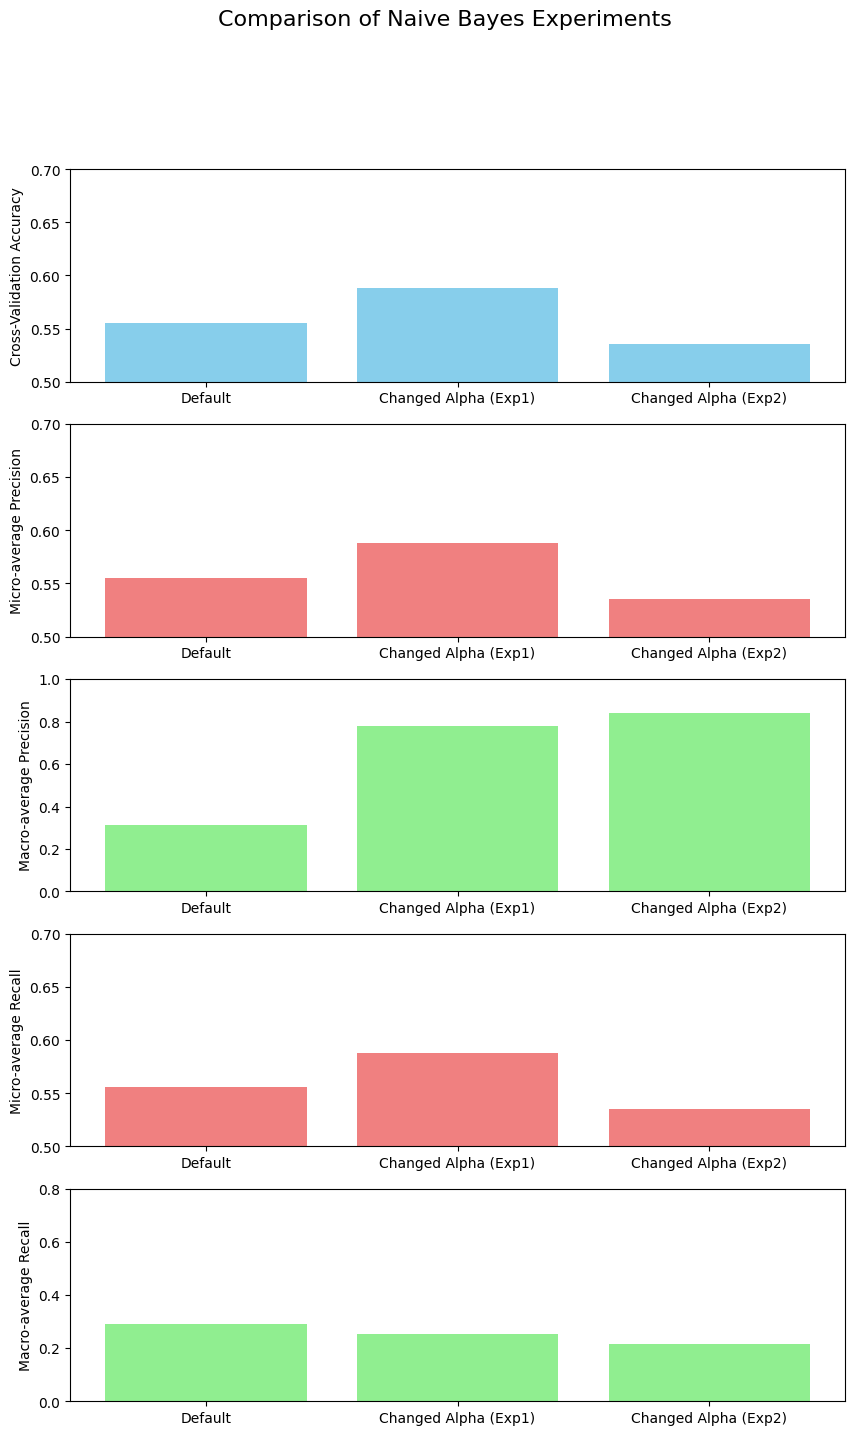

In [ ]:
# Results for Naive Bayes
accuracy_values_nb = [cross_val_results_gauss.mean(), cross_val_results_exp1.mean(), cross_val_results_exp2.mean()]
micro_precision_values_nb = [precision_micro_gauss, precision_micro_exp1, precision_micro_exp2]
macro_precision_values_nb = [precision_macro_gauss, precision_macro_exp1, precision_macro_exp2]
micro_recall_values_nb = [recall_micro_gauss, recall_micro_exp1, recall_micro_exp2]
macro_recall_values_nb = [recall_macro_gauss, recall_macro_exp1, recall_macro_exp2]

# Experiment labels
experiments_nb = ['Default', 'Changed Alpha (Exp1)', 'Changed Alpha (Exp2)']

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(10, 16))

# Cross-Validation Accuracy
axes[0].bar(experiments_nb, accuracy_values_nb, color='skyblue')
axes[0].set_ylabel('Cross-Validation Accuracy')
axes[0].set_ylim([0.5, 0.7])

# Micro-average Precision
axes[1].bar(experiments_nb, micro_precision_values_nb, color='lightcoral')
axes[1].set_ylabel('Micro-average Precision')
axes[1].set_ylim([0.5, 0.7])

# Macro-average Precision
axes[2].bar(experiments_nb, macro_precision_values_nb, color='lightgreen')
axes[2].set_ylabel('Macro-average Precision')
axes[2].set_ylim([0.0, 1.0])

# Micro-average Recall
axes[3].bar(experiments_nb, micro_recall_values_nb, color='lightcoral')
axes[3].set_ylabel('Micro-average Recall')
axes[3].set_ylim([0.5, 0.7])

# Macro-average Recall
axes[4].bar(experiments_nb, macro_recall_values_nb, color='lightgreen')
axes[4].set_ylabel('Macro-average Recall')
axes[4].set_ylim([0.0, 0.8])

# Title
fig.suptitle('Comparison of Naive Bayes Experiments', fontsize=16)
plt.show()

**For Naive Bayes**\
Cross-Validation Accuracy:

Both experiments with changed alpha values do not show a significant improvement in cross-validation accuracy. The accuracies are 0.61 for default, 0.56 for Experiment 1, and 0.54 for Experiment 2.

In experiment 2, the macro precision was 84% whereas the micro precision was 54%.
High macro precision implies good precision for individual classes, while low micro precision indicates challenges in maintaining precision across the entire dataset, possibly due to imbalances or difficulties in less frequent classes. This suggests the model excels in certain classes but struggles with overall precision.

Discussion:
The choice of the smoothing parameter (alpha) in Naive Bayes has a notable impact on macro-average precision and recall. Experiment 2, with a higher alpha value (10), shows a significant increase in macro-average precision but at the cost of a lower recall.

Further Exploration:
Fine-tuning the smoothing parameter and exploring other variations in the Naive Bayes model could provide additional insights into its performance. Additionally, experimenting with other types of Naive Bayes models (e.g., MultinomialNB) may yield different results.

**Reference**

sklearn cross validation:
https://scikit-learn.org/stable/modules/cross_validation.html


Sklearn Logistic Regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

sklearn Naive Bayes:
https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html


google colab plotting:
https://colab.research.google.com/github/grochmal/daml/blob/master/nb/plt-plotting-basics.ipynb

Dataset: Wine quality dataset.
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset